# Laborator 9

In [6]:
import numpy as np
import matplotlib.pyplot as plt

1. 

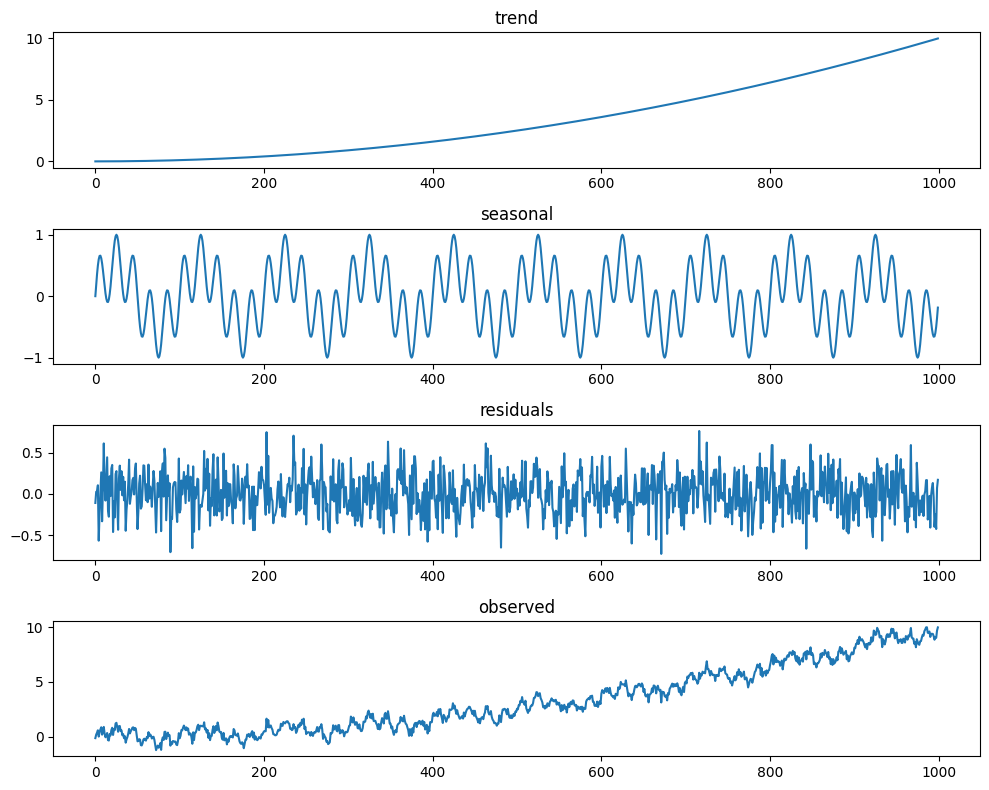

In [7]:
N = 1000
t = np.arange(N)

trend = 1e-5 * t ** 2 
seasonal = (np.sin(2 * np.pi * t * 1 /20) + np.sin(2 * np.pi * t * 1 / 100)) / 2 
residuals = np.random.normal(0, 1, N) / 4
time_series = trend + seasonal + residuals
plots = [trend, seasonal, residuals, time_series]
labels = ['trend', 'seasonal', 'residuals', 'observed']

fig, ax = plt.subplots(4, 1, figsize=(10, 8))
for i, p in enumerate(plots):
    ax[i].plot(t, p)
    ax[i].set_title(labels[i])
plt.tight_layout()
plt.savefig('1.pdf')
plt.show()


2.

In [8]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

alpha_values = [0.01, 0.03, 0.05, 0.07, 0.1, 0.3, 0.5, 0.7, 0.9]

errors_rmse = []

for a in alpha_values:
    model = ExponentialSmoothing(time_series, trend='add', seasonal='add', seasonal_periods=100) \
            .fit(smoothing_level=a)
    predictions = model.predict(start=0, end=N-1)
    rmse = np.sqrt(np.mean((time_series - predictions) ** 2))
    errors_rmse.append(rmse)

for i, alpha_val in enumerate(errors_rmse):
    print(f"Alpha = {alpha_values[i]}: RMSE = {errors_rmse[i]}")

alpha_optim = alpha_values[np.argmin(errors_rmse)]
print(f"Optimal alpha = {alpha_optim}")


Alpha = 0.01: RMSE = 0.29608743658768405
Alpha = 0.03: RMSE = 0.24103647016256213
Alpha = 0.05: RMSE = 0.2413217554921482
Alpha = 0.07: RMSE = 0.2418008845148035
Alpha = 0.1: RMSE = 0.2427784852076659
Alpha = 0.3: RMSE = 0.2518211952220391
Alpha = 0.5: RMSE = 0.2643450684712784
Alpha = 0.7: RMSE = 0.28194142237357483
Alpha = 0.9: RMSE = 0.305742114535457
Optimal alpha = 0.03


/Users/robys/miniconda3/envs/proc-semn/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


/Users/robys/miniconda3/envs/proc-semn/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


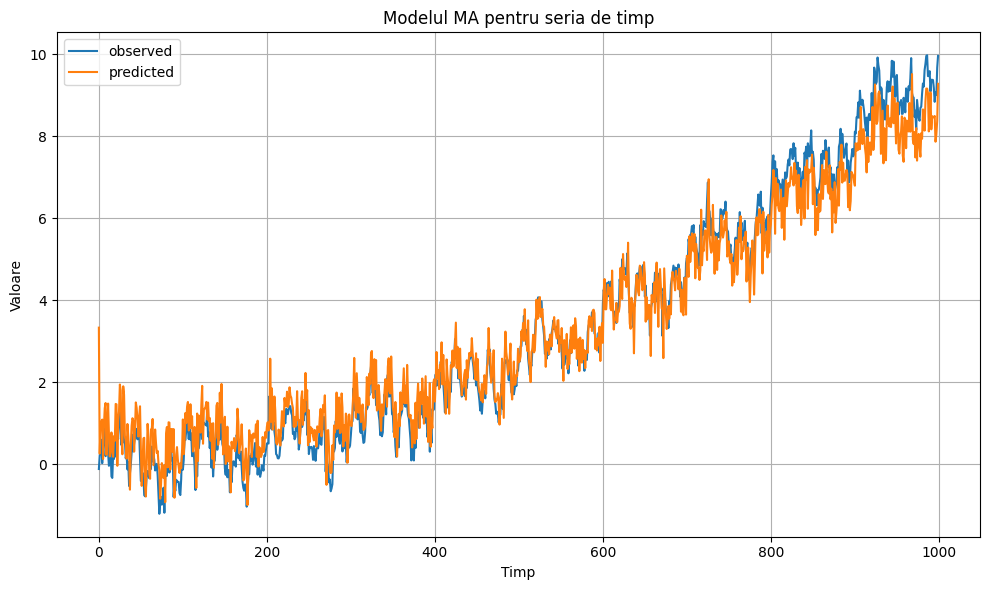

In [9]:
from statsmodels.tsa.arima.model import ARIMA

q = 5

termeni_eroare = np.random.normal(0, 1, N)

model = ARIMA(time_series, order=(0, 0, q), exog=termeni_eroare).fit()
predictions = model.predict(start=0, end=N-1)

plt.figure(figsize=(10, 6))
plt.plot(t, time_series, label='observed')
plt.plot(t, predictions, label='predicted')
plt.title('Modelul MA pentru seria de timp')
plt.xlabel('Timp')
plt.ylabel('Valoare')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('3.pdf')
plt.show()

In [17]:
from statsmodels.tsa.arima.model import ARIMA
import itertools

# Definirea unei liste de posibile valori pentru p și q
p_values = range(1, 21)  # Valori posibile pentru p
q_values = range(1, 21)  # Valori posibile pentru q

# Combinarea posibilă a valorilor lui p și q
combinatii_pq = list(itertools.product(p_values, q_values))

# Inițializarea parametrilor pentru ARMA
best_aic = float('inf')
best_order = None

# Iterăm prin fiecare combinație posibilă de p și q pentru a găsi cea mai bună
for order in combinatii_pq:

    model = ARIMA(time_series, order=(order[0], 0, order[1]))
    model_fit = model.fit()
    aic = model_fit.aic

    # Actualizăm cel mai bun AIC și parametrii corespunzători
    if aic < best_aic:
        best_aic = aic
        best_order = order



# Afișăm parametrii optimi p și q
print(f"Cei mai buni parametri ARMA: p = {best_order[0]}, q = {best_order[1]}")

# Inițializăm și potrivim modelul ARMA cu parametrii optimi
model_arma = ARIMA(time_series, order=best_order)
model_fit_arma = model_arma.fit()

# Faceți predicții utilizând modelul ARMA
predictii_arma = model_fit_arma.predict()

# Afișați predicțiile și seria de timp originală
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Seria de timp originală')
plt.plot(predictii_arma, label='Predictii ARMA')
plt.title('Model ARMA pentru seria de timp')
plt.xlabel('Timp')
plt.ylabel('Valoare')
plt.legend()
plt.grid()
plt.show()


691.0170231114912
(1, 1)
668.9538824319404
(1, 2)
657.492177902882
(1, 3)
648.8324144843054
(1, 4)


/Users/robys/miniconda3/envs/proc-semn/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/robys/miniconda3/envs/proc-semn/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


648.7572951965753
(1, 5)


/Users/robys/miniconda3/envs/proc-semn/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


641.9756675375443
(1, 6)


/Users/robys/miniconda3/envs/proc-semn/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


643.4970523904977


/Users/robys/miniconda3/envs/proc-semn/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


605.6672530514845
(1, 8)


/Users/robys/miniconda3/envs/proc-semn/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


595.9894504228378
(1, 9)


KeyboardInterrupt: 